# Analysis annotations
This notebook contains an analysis of Natural Language Queries annotations present in the dataset [Ego4D](https://ego4d-data.org/docs/). 

**Note**: before running the notebook insert the right paths in the variables `PATH_ANNOTATIONS` and `PATH_EGO4D_JSON`.  
It was not possible to include these files directly in the repository due to the limitations imposed by the contract signed to access the data.

## Data loading

In [1]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt

PATH_ANNOTATIONS = ""
PATH_EGO4D_JSON = ""

#Load json file
with open(PATH_ANNOTATIONS,  'r') as f:
    data = json.load(f)

#Create dataframe with "query granularity"
annotations_data = []
for video in data['videos']:
    for clip in video['clips']:
        for annotation in clip['annotations']:
            for query in annotation['language_queries']:
                annotation_info = {
                    'video_uid': video.get('video_uid'),
                    'clip_uid': clip.get('clip_uid'),
                    'global_video_start_sec': clip.get('video_start_sec'),
                    'global_video_end_sec': clip.get('video_end_sec'),
                    'global_video_start_frame': clip.get('video_start_frame'),
                    'global_video_end_frame': clip.get('video_end_frame'),
                    'global_clip_start_sec': clip.get('clip_start_sec'),
                    'global_clip_end_sec': clip.get('clip_end_sec'),
                    'global_clip_start_frame': clip.get('clip_start_frame'),
                    'global_clip_end_frame': clip.get('clip_end_frame'),
                    'source_clip_uid': clip.get('source_clip_uid'),
                    'clip_start_sec': query.get('clip_start_sec'),
                    'clip_end_sec': query.get('clip_end_sec'),
                    'video_start_sec': query.get('video_start_sec'),
                    'video_end_sec': query.get('video_end_sec'),
                    'video_start_frame': query.get('video_start_frame'),
                    'video_end_frame': query.get('video_end_frame'),
                    'template': query.get('template'),
                    'query': query.get('query'),
                    'slot_x': query.get('slot_x'),
                    'verb_x': query.get('verb_x'),
                    'slot_y': query.get('slot_y'),
                    'verb_y': query.get('verb_y'),
                    'raw_tags': query.get('raw_tags')
                }
                annotations_data.append(annotation_info)

df_annotations = pd.DataFrame(annotations_data)

In [2]:
#Print dataframe
pd.set_option('display.max_columns', None)
df_annotations.head()

,video_uid,clip_uid,global_video_start_sec,global_video_end_sec,global_video_start_frame,global_video_end_frame,global_clip_start_sec,global_clip_end_sec,global_clip_start_frame,global_clip_end_frame,source_clip_uid,clip_start_sec,clip_end_sec,video_start_sec,video_end_sec,video_start_frame,video_end_frame,template,query,slot_x,verb_x,slot_y,verb_y,raw_tags
0,d250521e-5197-44aa-8baa-2f42b24444d2,fae92e70-88aa-4b77-b41a-5879b74c804c,0.021029,480.021029,1,14401,0,480.0,0,14400,51e04dae-3ad0-48c1-b94b-c3ba0edaa99e,0.00000,43.6657,0.021029,43.686729,1,1311,Objects: How many X’s? (quantity question),How many frying pans can i see on the shelf?,frying pans,[verb_not_applicable],i See on the shelf,see,"[Objects: How many X’s? (quantity question), H..."
1,d250521e-5197-44aa-8baa-2f42b24444d2,fae92e70-88aa-4b77-b41a-5879b74c804c,0.021029,480.021029,1,14401,0,480.0,0,14400,51e04dae-3ad0-48c1-b94b-c3ba0edaa99e,55.80900,60.2600,55.830029,60.281029,1675,1809,Objects: What X did I Y?,What colour bowl did i carry from the plate st...,colour bowl,[verb_not_applicable],I Carry from the plate stand,carry,"[Objects: What X did I Y?, What colour bowl di..."
2,d250521e-5197-44aa-8baa-2f42b24444d2,fae92e70-88aa-4b77-b41a-5879b74c804c,0.021029,480.021029,1,14401,0,480.0,0,14400,51e04dae-3ad0-48c1-b94b-c3ba0edaa99e,62.70855,72.2100,62.729579,72.231029,1882,2167,Objects: In what location did I see object X ?,In what location did i see the basket?,i See the basket,see,None,None,[Objects: In what location did I see object X ...
3,d250521e-5197-44aa-8baa-2f42b24444d2,fae92e70-88aa-4b77-b41a-5879b74c804c,0.021029,480.021029,1,14401,0,480.0,0,14400,51e04dae-3ad0-48c1-b94b-c3ba0edaa99e,150.49668,154.4890,150.517709,154.510029,4516,4636,Objects: What did I put in X?,What did i pour in the bowl?,I Pour in the bowl,pour,None,None,"[Objects: What did I put in X?, What did i pou..."
4,d250521e-5197-44aa-8baa-2f42b24444d2,fae92e70-88aa-4b77-b41a-5879b74c804c,0.021029,480.021029,1,14401,0,480.0,0,14400,51e04dae-3ad0-48c1-b94b-c3ba0edaa99e,7.16000,8.5180,7.181029,8.539029,216,257,Objects: Where is object X before / after even...,Where was the soap before i picked it up?,soap,[verb_not_applicable],i picked it up,pick,[Objects: Where is object X before / after eve...


In [3]:
#Compute and add clip duration
df_annotations['segm_dur_frame'] = df_annotations['video_end_frame'] - df_annotations['video_start_frame']
df_annotations.head()

,video_uid,clip_uid,global_video_start_sec,global_video_end_sec,global_video_start_frame,global_video_end_frame,global_clip_start_sec,global_clip_end_sec,global_clip_start_frame,global_clip_end_frame,source_clip_uid,clip_start_sec,clip_end_sec,video_start_sec,video_end_sec,video_start_frame,video_end_frame,template,query,slot_x,verb_x,slot_y,verb_y,raw_tags,segm_dur_frame
0,d250521e-5197-44aa-8baa-2f42b24444d2,fae92e70-88aa-4b77-b41a-5879b74c804c,0.021029,480.021029,1,14401,0,480.0,0,14400,51e04dae-3ad0-48c1-b94b-c3ba0edaa99e,0.00000,43.6657,0.021029,43.686729,1,1311,Objects: How many X’s? (quantity question),How many frying pans can i see on the shelf?,frying pans,[verb_not_applicable],i See on the shelf,see,"[Objects: How many X’s? (quantity question), H...",1310
1,d250521e-5197-44aa-8baa-2f42b24444d2,fae92e70-88aa-4b77-b41a-5879b74c804c,0.021029,480.021029,1,14401,0,480.0,0,14400,51e04dae-3ad0-48c1-b94b-c3ba0edaa99e,55.80900,60.2600,55.830029,60.281029,1675,1809,Objects: What X did I Y?,What colour bowl did i carry from the plate st...,colour bowl,[verb_not_applicable],I Carry from the plate stand,carry,"[Objects: What X did I Y?, What colour bowl di...",134
2,d250521e-5197-44aa-8baa-2f42b24444d2,fae92e70-88aa-4b77-b41a-5879b74c804c,0.021029,480.021029,1,14401,0,480.0,0,14400,51e04dae-3ad0-48c1-b94b-c3ba0edaa99e,62.70855,72.2100,62.729579,72.231029,1882,2167,Objects: In what location did I see object X ?,In what location did i see the basket?,i See the basket,see,None,None,[Objects: In what location did I see object X ...,285
3,d250521e-5197-44aa-8baa-2f42b24444d2,fae92e70-88aa-4b77-b41a-5879b74c804c,0.021029,480.021029,1,14401,0,480.0,0,14400,51e04dae-3ad0-48c1-b94b-c3ba0edaa99e,150.49668,154.4890,150.517709,154.510029,4516,4636,Objects: What did I put in X?,What did i pour in the bowl?,I Pour in the bowl,pour,None,None,"[Objects: What did I put in X?, What did i pou...",120
4,d250521e-5197-44aa-8baa-2f42b24444d2,fae92e70-88aa-4b77-b41a-5879b74c804c,0.021029,480.021029,1,14401,0,480.0,0,14400,51e04dae-3ad0-48c1-b94b-c3ba0edaa99e,7.16000,8.5180,7.181029,8.539029,216,257,Objects: Where is object X before / after even...,Where was the soap before i picked it up?,soap,[verb_not_applicable],i picked it up,pick,[Objects: Where is object X before / after eve...,41


## Preliminary considerations on some fields

       global_video_start_sec  global_video_end_sec  global_video_start_frame  \
count            11296.000000          11296.000000              11296.000000   
mean               646.061936           1168.737921              24397.462553   
std               1088.014030           1099.364012              39270.572526   
min                 -0.012305            300.036674                  0.000000   
25%                  0.021029            480.057703                  1.000000   
50%                180.000000            660.021029               5400.000000   
75%                899.996667           1405.154362              37536.000000   
max              14754.821029          15234.887701             471686.000000   

       global_video_end_frame  global_clip_start_sec  global_clip_end_sec  \
count            11296.000000                11296.0         11296.000000   
mean             36696.139518                    0.0           522.676425   
std              35634.168264          

<Axes: >

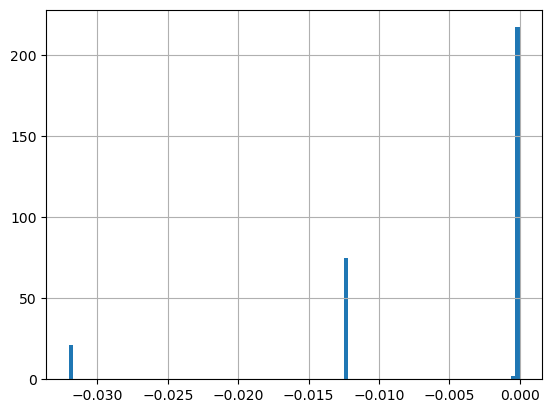

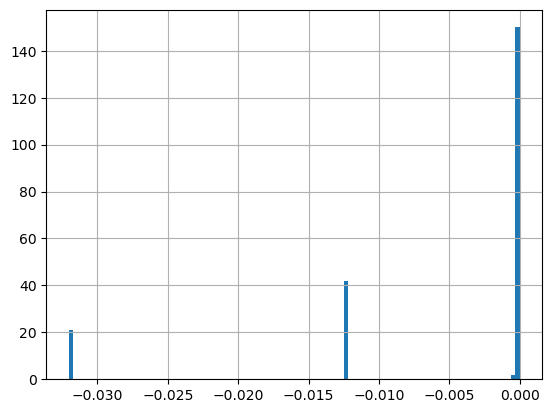

In [4]:
import matplotlib.pyplot


print(df_annotations.describe())

unique_templates = df_annotations['template'].unique()
print(f"Templates: {unique_templates}")
print()

print(f"Possible values for global_clip_start_sec: {df_annotations['global_clip_start_sec'].unique()}")
unique_global_clip_start_frame = df_annotations['global_clip_start_frame'].unique()
print(f"Possible values for global_clip_start_frame: {unique_global_clip_start_frame}") # --> global_clip_start_frame is always set to 0 (as if time restarted from 0 inside each clip), 
# even if the start_frame of that clip might be different from 0 w.r.t. its corresponding video span.
# N.B. Then, this quantity is not significant if compared to "video_start_frame" and "video_end_frame" because they 
# have a different 0 as a reference. These last two columns should be compared instead with "global_video_start_frame" and "global_video_end_frame".
print()

unique_global_clip_end_frame = df_annotations['global_clip_end_frame'].unique()
print(f"Number of unique global_clip_end_frame values: {unique_global_clip_end_frame.size}") # --> clips can have very different durations.
print()

unique_global_video_start_frame = df_annotations['global_video_start_frame'].unique()
print(f"Number of unique global_video_start_frame values: {unique_global_video_start_frame.size}") # --> clips can start in every moment.

#---------------------------------------------------------------------------------------------------------------------------------------------

print(f"clip_start_sec lower than video_start_sec: {(df_annotations['clip_start_sec']<=df_annotations['video_start_sec']).value_counts()}")
# videos can start before 0
video_id_start_lower_0 = df_annotations.loc[df_annotations['video_start_sec']<0, :]['video_uid'].unique()
print(f"Video_id when the start sec is lower than 0: {video_id_start_lower_0}")
mask_video_sec_lower = df_annotations["video_start_sec"] < df_annotations["clip_start_sec"]
print(f"Number of videos_id with video_start_sec lower than clip_start_sec: {df_annotations.loc[mask_video_sec_lower, :]['video_uid'].unique().size}")
# Note that video_start_sec can be lower than clip_start_sec because the video_start_sec can start from negative numbers
fig, ax = plt.subplots(1)
df_annotations_video_sec_lower = df_annotations.loc[mask_video_sec_lower, :]
(df_annotations_video_sec_lower["video_start_sec"]-df_annotations_video_sec_lower["clip_start_sec"]).hist(ax = ax, bins = 100)

# plot when video_start_sec is lower than clip_start_sec, but removing videos whose start is lower than 0 (because every clip starts always at 0, so the difference could be the problem)
fig, ax = plt.subplots(1)
df_annotations_video_sec_lower = df_annotations.loc[mask_video_sec_lower & (~df_annotations['video_uid'].isin(video_id_start_lower_0)), :]
# now the frequency is lower, but not zero. This is probably just a small bug in the annotations
(df_annotations_video_sec_lower["video_start_sec"]-df_annotations_video_sec_lower["clip_start_sec"]).hist(ax = ax, bins = 100)


In [5]:
#Select rows where "template"==None
rows_with_none_template = df_annotations.loc[df_annotations['template'].isna()]

#The 65 queries in question are actually regular queries that should be categorized under the other template types already seen. Nonetheless, they were labeled as 'None' in the 'template' column.

# Check if they have duration 0 (the answer is no)
print((df_annotations["segm_dur_frame"]==0).value_counts())
print((rows_with_none_template["segm_dur_frame"]==0).value_counts())
print(rows_with_none_template.describe())
rows_with_none_template.head()

segm_dur_frame
False    8047
True     3249
Name: count, dtype: int64
segm_dur_frame
False    37
True     28
Name: count, dtype: int64
       global_video_start_sec  global_video_end_sec  global_video_start_frame  \
count               65.000000             65.000000                 65.000000   
mean               656.311199           1176.749693              25716.876923   
std                664.293834            672.906045              26872.264719   
min                  0.000000            478.254362                  0.000000   
25%                 59.978971            480.066673               1799.000000   
50%                539.975638           1020.000000              18901.000000   
75%               1170.021029           1633.698698              46220.000000   
max               2429.978971           2910.036613              95688.000000   

       global_video_end_frame  global_clip_start_sec  global_clip_end_sec  \
count               65.000000                   65.0       

,video_uid,clip_uid,global_video_start_sec,global_video_end_sec,global_video_start_frame,global_video_end_frame,global_clip_start_sec,global_clip_end_sec,global_clip_start_frame,global_clip_end_frame,source_clip_uid,clip_start_sec,clip_end_sec,video_start_sec,video_end_sec,video_start_frame,video_end_frame,template,query,slot_x,verb_x,slot_y,verb_y,raw_tags,segm_dur_frame
145,d91dc73b-0c0e-49ed-960c-4534e7557c48,77a2e39b-4982-4c53-9a98-e9c7708721c6,630.000000,996.266654,29888,29888,0,366.266654,0,10988,0279456f-4f9d-4f7e-930c-4b2614a3e787,193.73566,206.00000,823.735660,836.000000,29888,29888,None,Where did I put the box with wooden tiles?,Wooden tiles,put,None,None,"[None, Where did I put the box with wooden til...",0
984,780e41b7-b6c2-4a59-8b06-11ec5af6d43e,e0b0ee85-ad8f-47de-ba8b-35c147d84f1c,179.987695,659.987695,5400,19800,0,480.000000,0,14400,485eafb0-1286-4278-b85a-d92c30e3e810,13.28597,13.28597,193.273665,193.273665,5799,5799,None,who did I talk to in the house,talk to,talk,None,None,"[None, who did I talk to in the house, talk to...",0
987,780e41b7-b6c2-4a59-8b06-11ec5af6d43e,e0b0ee85-ad8f-47de-ba8b-35c147d84f1c,179.987695,659.987695,5400,19800,0,480.000000,0,14400,485eafb0-1286-4278-b85a-d92c30e3e810,141.58393,141.58393,321.571625,321.571625,9648,9648,None,Who did I interact with while walking in the ...,while walking,walk,None,None,"[None, Who did I interact with while walking ...",0
994,526a15e9-39a2-49a0-ba0b-83da2e276b09,b66e0c62-810f-40ba-a453-050fe752ea67,180.021029,660.021029,5401,19801,0,480.000000,0,14400,06e808f9-a469-4ae5-b976-6d1fcac75ab5,267.30235,276.65550,447.323379,456.676529,13420,13701,None,Where was the glass jug before I picked it up?,glass jug,[verb_not_applicable],I picked it up,pick,"[None, Where was the glass jug before I picked...",281
1207,dd0aa717-59d8-4d8a-9f11-21be827fb184,0ad00ff1-054b-4843-ba3a-8fda76311e0c,1169.954362,1649.954362,35099,49499,0,480.000000,0,14400,40465acd-c901-4cac-9a96-5a581001d21e,127.02521,127.63200,1296.979572,1297.586362,38910,38928,None,where did I put the hat?,hat,put,None,None,"[None, where did I put the hat?, hat, put]",18


## Analysis related to Duration

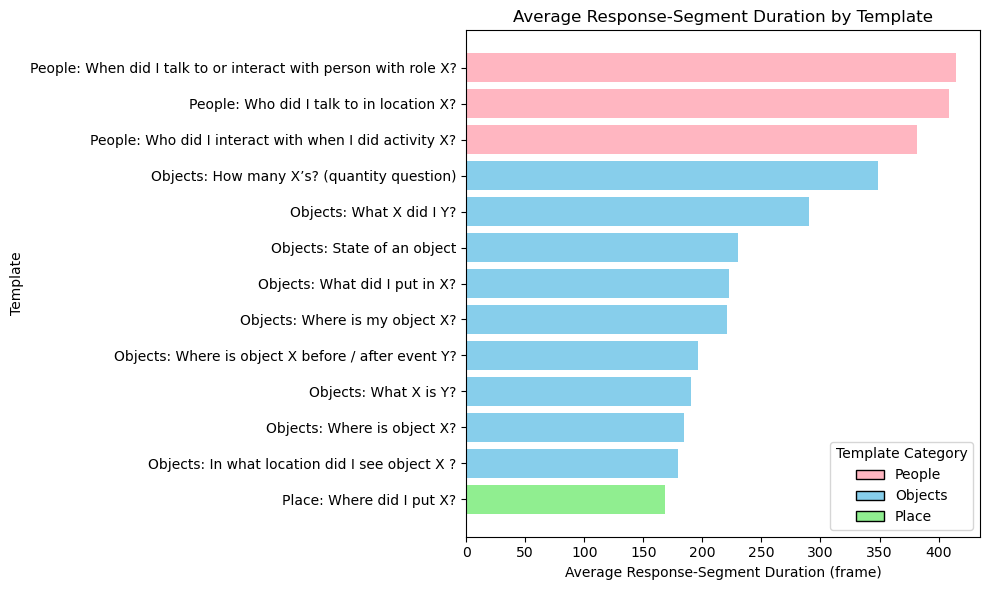

In [6]:
#Function to map colors based on template prefixes
def map_colors(template_name):
    if template_name.startswith('Place'):
        return 'lightgreen'
    elif template_name.startswith('People'):
        return 'lightpink'
    elif template_name.startswith('Objects'):
        return 'skyblue'

#Group by template and compute the mean of segment_duration
template_groups = df_annotations.groupby('template')
template_avg_duration = template_groups['segm_dur_frame'].mean()

#Sort the data in descending order by average segment duration
template_avg_duration_sorted = template_avg_duration.sort_values(ascending=True)

#Plot
plt.figure(figsize=(10, 6))
for template_name, avg_duration in template_avg_duration_sorted.items():
    plt.barh(template_name, avg_duration, color=map_colors(template_name))

#legend
def create_legend():
    legend_handles = [
        plt.Rectangle((0,0),1,1, color='lightpink', ec="k"),
        plt.Rectangle((0,0),1,1, color='skyblue', ec="k"),
        plt.Rectangle((0,0),1,1, color='lightgreen', ec="k")
    ]
    plt.legend(legend_handles, ['People', 'Objects', 'Place'], title='Template Category', loc='lower right')


plt.title('Average Response-Segment Duration by Template')
plt.xlabel('Average Response-Segment Duration (frame)')
plt.ylabel('Template')
create_legend()
plt.tight_layout()
plt.savefig("AvgRespondeDurByTemplate.pdf")
plt.show()

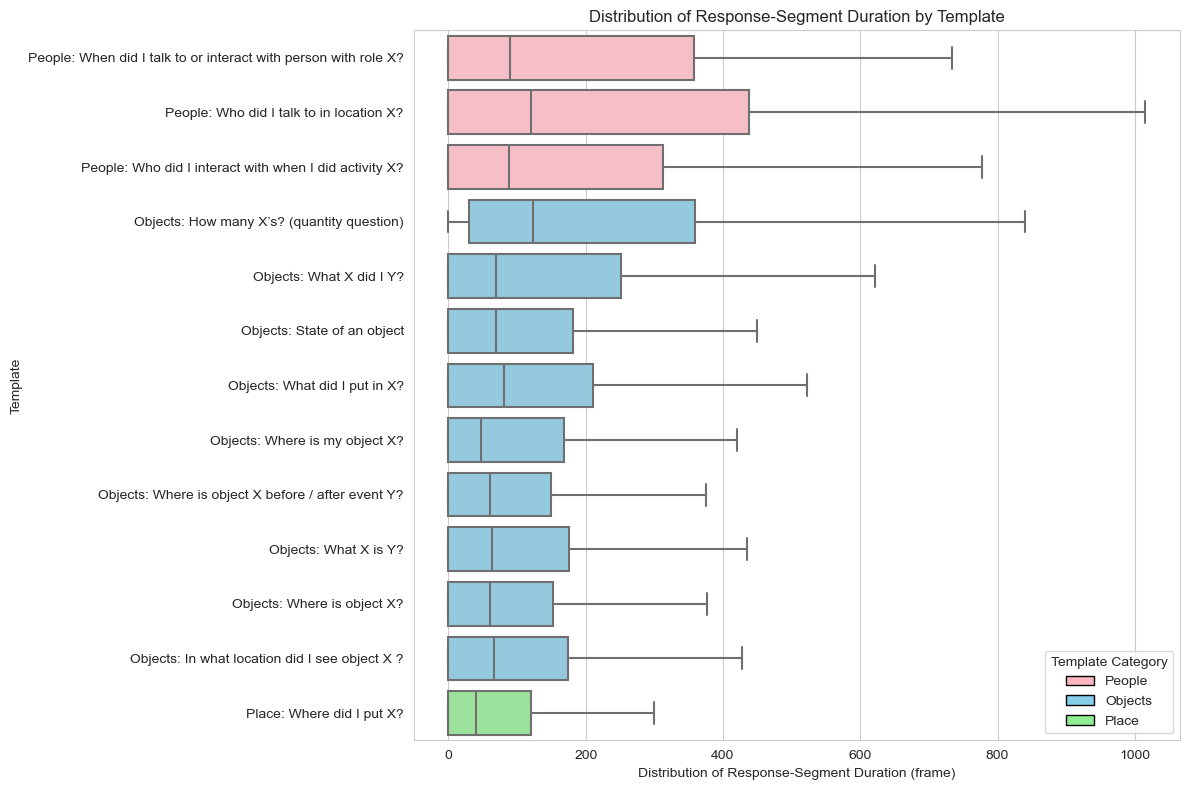

In [7]:
import seaborn as sns
sns.set_style("whitegrid")

#Function to map colors, based on macro template
def map_colors(template_name):
    if template_name.startswith('Place'):
        return 'lightgreen'
    elif template_name.startswith('People'):
        return 'lightpink'
    elif template_name.startswith('Objects'):
        return 'skyblue'
    
#Map colors to each template
template_colors = {template: map_colors(template) for template in template_avg_duration_sorted.index}
    
#Plot the distribution of segment duration (in frame) for each one of the different templates.
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_annotations, y='template', x='segm_dur_frame', order=template_avg_duration_sorted.index[::-1], hue='template', palette=template_colors, dodge=False, showfliers=False)
plt.legend([],[], frameon=False)
#(do not show outliers with "showfliers=False", in order to make the graph more readable)
plt.title('Distribution of Response-Segment Duration by Template')
plt.ylabel('Template')
plt.xlabel('Distribution of Response-Segment Duration (frame)')
create_legend()
plt.tight_layout()
plt.savefig("DistributionOfSegmentDurationByTemplate.pdf")
plt.show()


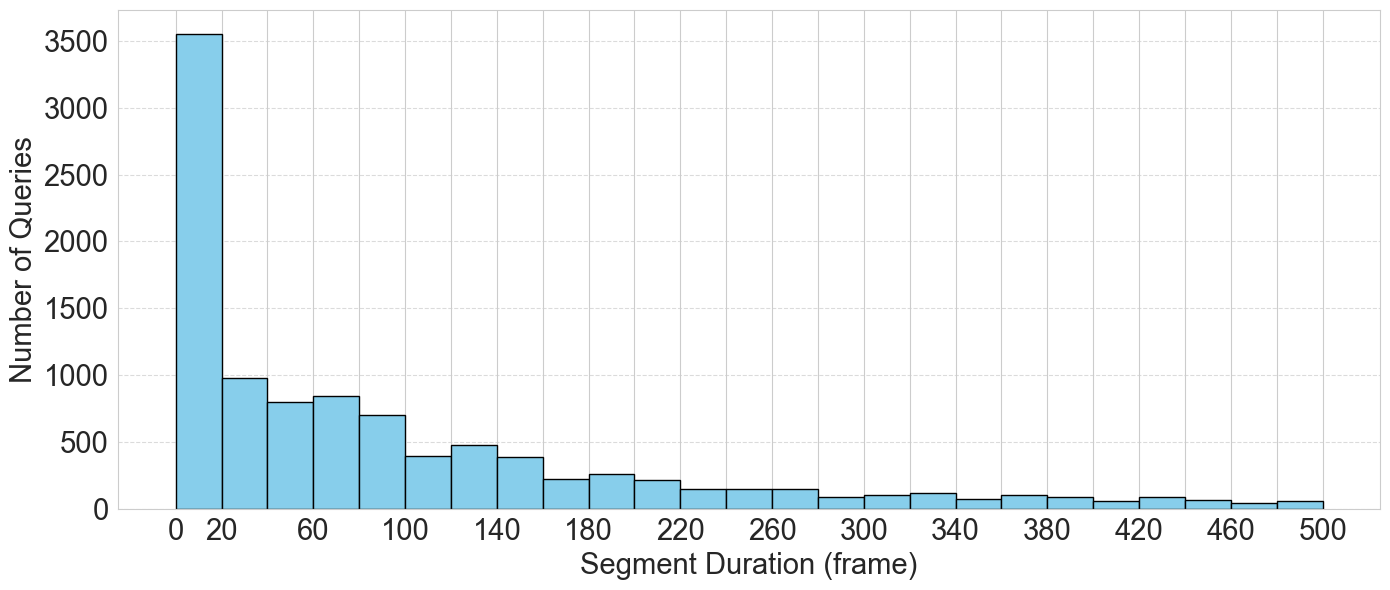

In [8]:
#Discretize the [0,500] interval on the x-axis (duration - in frame) over 25 bins of the same length.
bins = [i * 20 for i in range(26)]

#Plot the distribution of queries w.r.t. their segment duration (in frame).
plt.figure(figsize=(14, 6))
plt.hist(df_annotations['segm_dur_frame'], bins=bins, edgecolor='black', color='skyblue')#, density=True)
#plt.title('Number of Queries by Response-Segment Duration')
plt.xlabel('Segment Duration (frame)')
plt.ylabel('Number of Queries')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# change the font size
ax = plt.gca()
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(21)

    
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [label if index%2==1 else '' for index, label in enumerate(labels)]
labels[0] = "0"
ax.set_xticklabels(labels)

plt.tight_layout()
plt.savefig("NumberQueriesByResponseDuration.pdf")
plt.show()


## Analysis related to Template

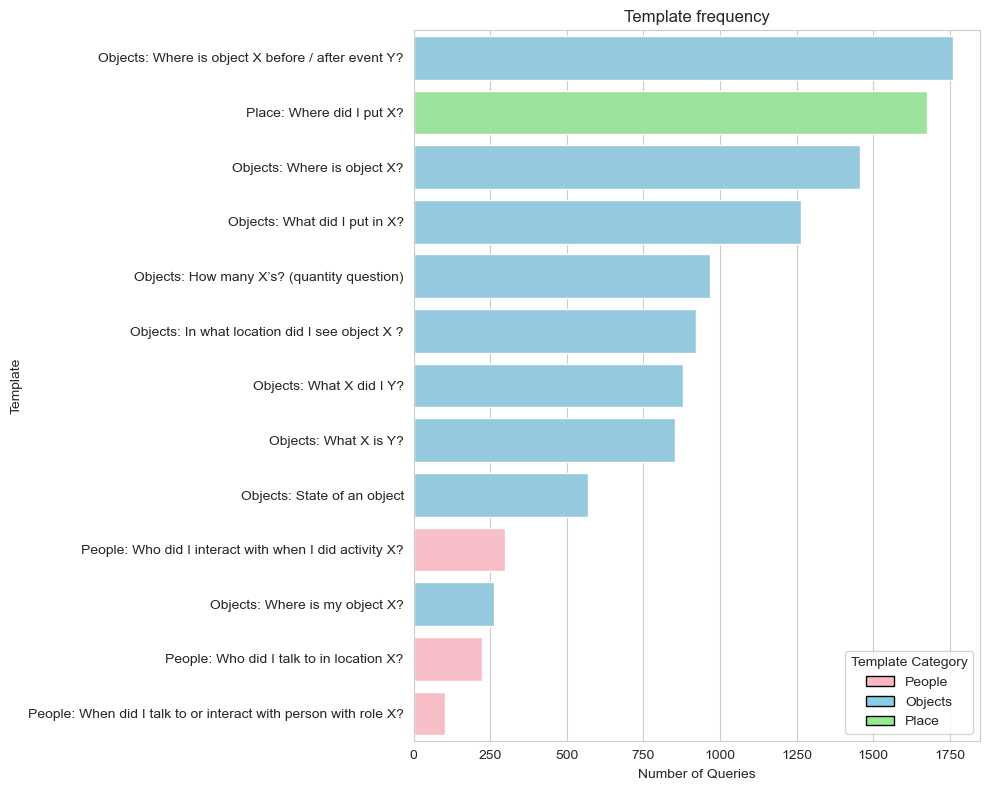

In [9]:
#Function to map colors, based on macro template
def map_colors(template_name):
    if template_name.startswith('Place'):
        return 'lightgreen'
    elif template_name.startswith('People'):
        return 'lightpink'
    elif template_name.startswith('Objects'):
        return 'skyblue'

sorted_templates = df_annotations['template'].value_counts().sort_values(ascending=False)

#Map colors to each template
template_colors = {template: map_colors(template) for template in sorted_templates.index}

#Plot the countplot with templates in ascending order and mapped colors
plt.figure(figsize=(10, 8))
sns.countplot(y='template', data=df_annotations, order=sorted_templates.index, palette=template_colors)
plt.legend([],[], frameon=False)
plt.title('Template frequency')
plt.xlabel('Number of Queries')
plt.ylabel('Template')
create_legend()
plt.tight_layout()
plt.savefig("template_frequency.pdf")
plt.show()

## Analysis of the Co-occurrence of Template pairs in Clips

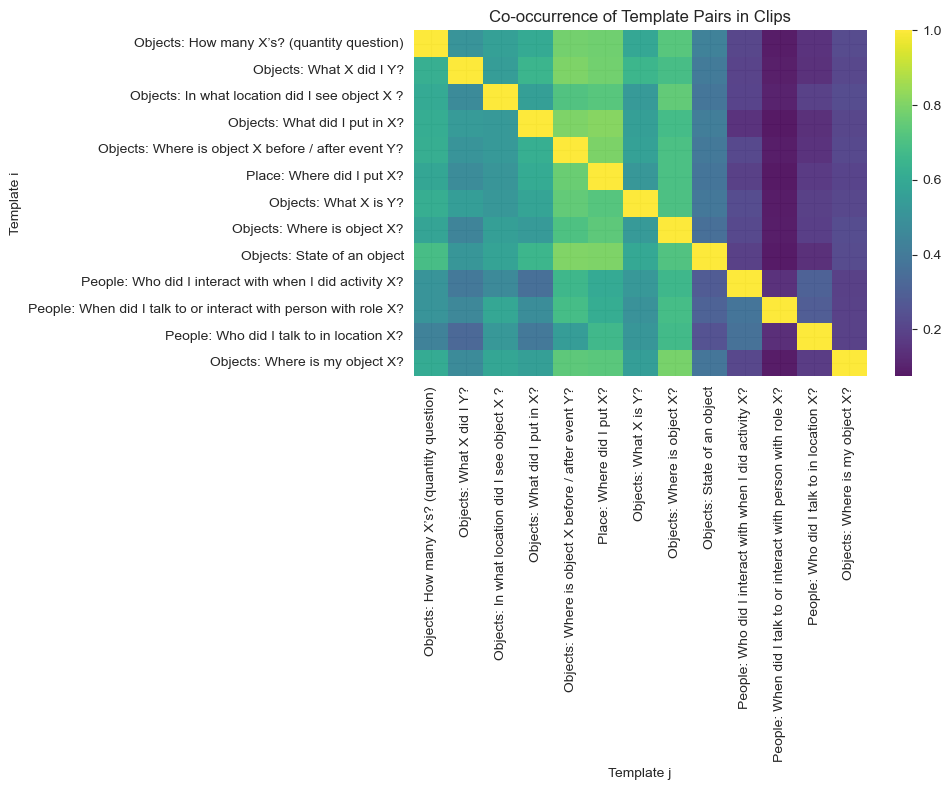

In [10]:
#Unique clip_uids
unique_clip_uids = df_annotations['clip_uid'].unique()

#Initialize a dictionary to store the co-occurrence counts
co_occurrence_counts = {}

#Iterate over "unique_clip_uids" to count the co-occurrences
for clip_uid in unique_clip_uids:
    #Get all the templates present in the current clip, excluding None
    templates_present = df_annotations[df_annotations['clip_uid'] == clip_uid]['template'].dropna().unique()
    #Count co-occurrences of template pairs (over the list of "templates_present")
    for i, template_i in enumerate(templates_present):
        for j, template_j in enumerate(templates_present):
            pair = (template_i, template_j)
            co_occurrence_counts[pair] = co_occurrence_counts.get(pair, 0) + 1

#Initialize the matrix used to store co-occurrence "probabilities"
unique_annotations = df_annotations['template'].dropna().unique()
num_templates = len(unique_annotations)
co_occurrence_matrix = np.zeros((num_templates, num_templates))

#Populate the "co_occurrence_matrix"
for i, template_i in enumerate(unique_annotations):
    for j, template_j in enumerate(unique_annotations):
        pair = (template_i, template_j)
        pair_count = co_occurrence_counts.get(pair, 0) # 0 if the couple i,j is never present
        clips_with_template_i_count = co_occurrence_counts.get((template_i, template_i), 1) # 1 to avoid /0 division
        co_occurrence_matrix[i, j] = pair_count / clips_with_template_i_count

#Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(co_occurrence_matrix, cmap='viridis', xticklabels=unique_annotations, yticklabels=unique_annotations, alpha=0.9)
plt.title('Co-occurrence of Template Pairs in Clips')
plt.xlabel('Template j')
plt.ylabel('Template i')

plt.tight_layout()
plt.savefig("Co-occurrenceOfTemplatePairsInClips.pdf")
plt.show()

## Analysis related to the distribution of the answer segments along the CLIPS
In the annotations it is used the term 'video' instead of 'clip' in some field names. 

In [11]:
#Add a new column to the dataframe: "rel_seg_pos_clip". It represents the relative segment position within its clip. It's computed as: (midpoint of the segment - start point of the clip)/(end point of the clip - start point of the clip).
df_annotations['rel_seg_pos_clip'] = ((df_annotations['video_start_frame'] + df_annotations['video_end_frame'])/2 - df_annotations['global_video_start_frame']) / (df_annotations['global_video_end_frame'] - df_annotations['global_video_start_frame'])
#df_annotations

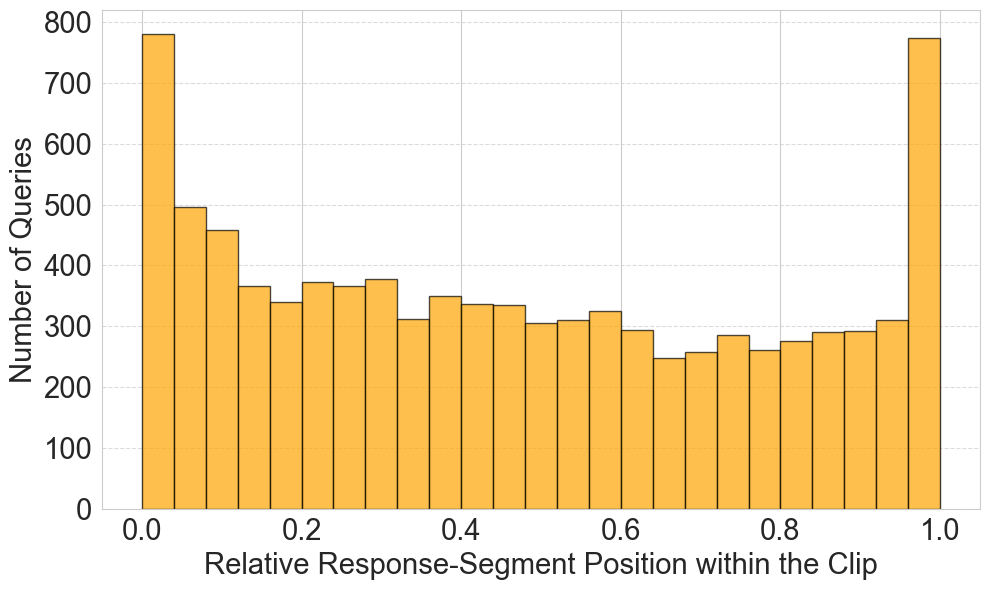

In [12]:
# Define the bins for rel_seg_pos_clip
bins = 25 

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist (df_annotations['rel_seg_pos_clip'], bins=bins, edgecolor='black', color='orange', alpha=0.7)#, density=True)
#plt.title('Number of Queries by Relative Segment Position within the Clip')
plt.xlabel('Relative Response-Segment Position within the Clip')
plt.ylabel('Number of Queries')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# change the font size
ax = plt.gca()
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(21)

plt.tight_layout()
plt.savefig("RelativeSegmentPosition.pdf")
plt.show()



## Analysis and comparison with "ego4d.json"

In [13]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt

#Load json file
with open(PATH_EGO4D_JSON) as f:
    data = json.load(f)

#Create dataframe with "query granularity"
ego4d_data = []
for video in data['videos']:
    for scenario in video['scenarios']:
        ego4d_info = {
            'video_uid': video.get('video_uid'),
            'duration_in_frame': (video.get('duration_sec')*30), # 30 frames per second
            'scenario': scenario
        }
        ego4d_data.append(ego4d_info)

df_ego4d = pd.DataFrame(ego4d_data)
df_ego4d.head()

,video_uid,duration_in_frame,scenario
0,77cc4654-4eec-44c6-af05-dbdf71f9a401,37413.9,"Car - commuting, road trip"
1,77cc4654-4eec-44c6-af05-dbdf71f9a401,37413.9,Talking with family members
2,3e08beb0-9108-4e77-b2ae-80f91ceac474,18114.9,Crafting/knitting/sewing/drawing/painting
3,c3f5972e-9919-496c-a01a-75ffa5c7bcff,7143.9,Carpenter
4,a437e059-78be-4894-a7ab-dc27fa16d3f8,296379.0,Hiking


In [14]:
unique_scenarios = df_ego4d['scenario'].unique()
print(f"Overall there are {len(unique_scenarios)} different scenarios, among all the videos of ego4d.json")
#unique_scenarios

Overall there are 136 different scenarios, among all the videos of ego4d.json


In [15]:
#Merge the two dataframes "df_annotations" and "df_ego4d" on the field "video_uid"
merged_df = pd.merge(df_annotations, df_ego4d, on='video_uid')
unique_scenarios_nlq_train = merged_df['scenario'].unique()
print(f"Overall there are {len(unique_scenarios)} different scenarios, among all the videos of nlq_train.json")
#unique_scenarios_nlq_train

Overall there are 136 different scenarios, among all the videos of nlq_train.json


### Analysis of ego4d.json

Distribution of scenarios in the ego4d dataset

There are 59 low-frequency scenarios (present less than 11 times):
scenario
Doing hair/make-up                                                    10
Golfing                                                               10
Making a salad/sandwich                                               10
Hosting a party                                                       10
BasketBall                                                            10
Working in outdoor store                                              10
Taking photos in photography studio                                    9
Gaming arcade / pool / billiards                                       9
Skateboard/scooter                                                     9
Getting car fixed                                                      9
Going to a salon (nail, hair, spa)                                     9
Yoga practice                                                          9
Eating in a canteen                             

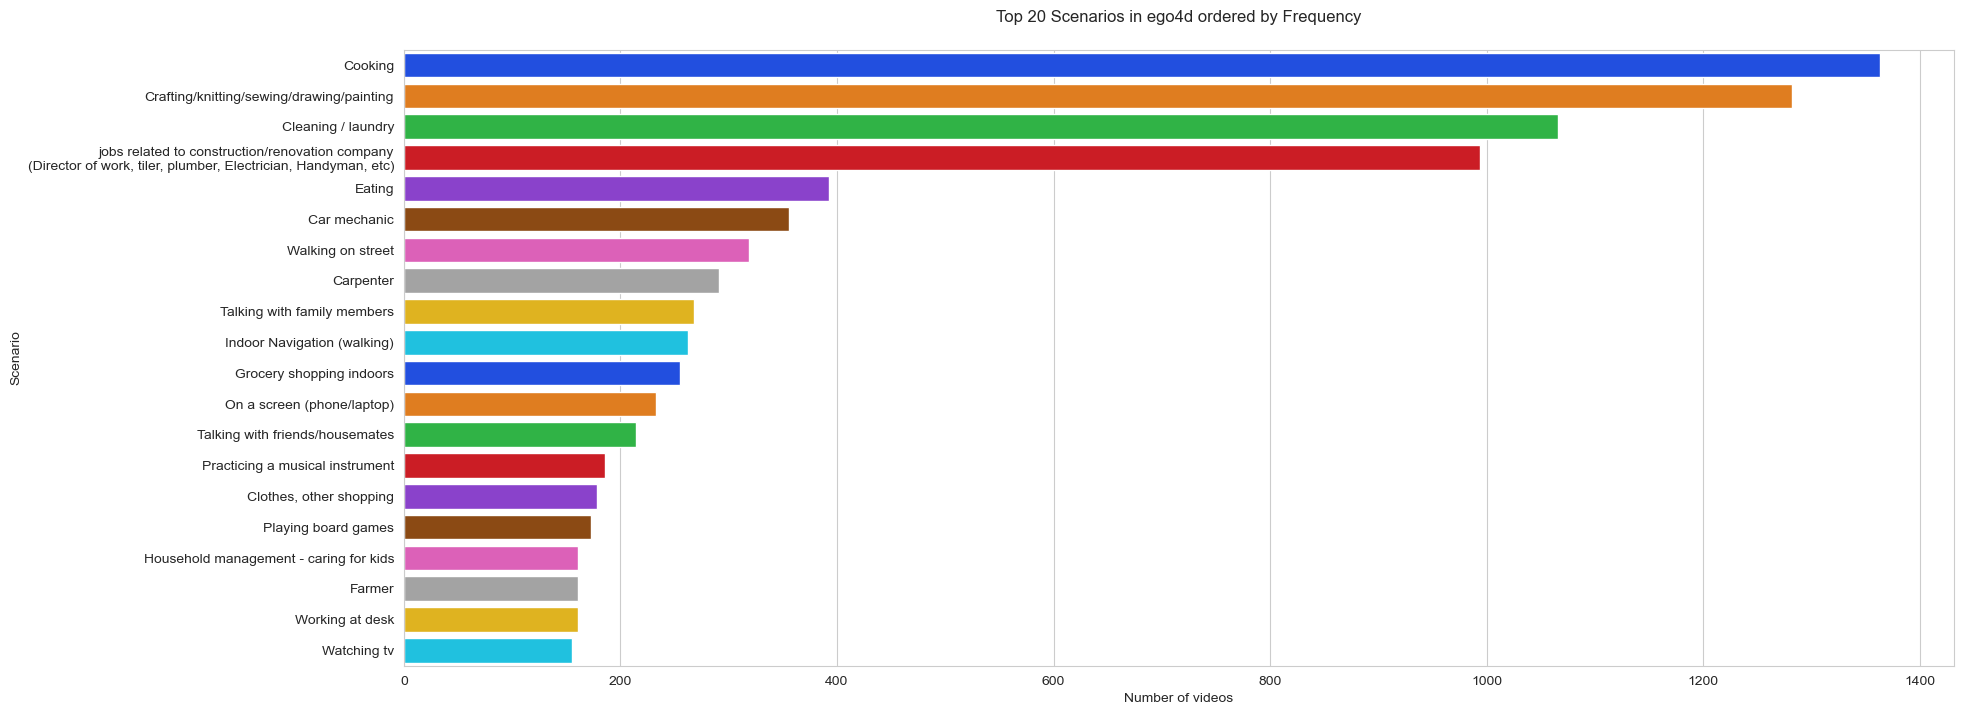

In [16]:
import seaborn as sns
sns.set_style("whitegrid")

# Compute the scenarios' frequency and order scenarios w.r.t. their frequency
scenario_counts = df_ego4d['scenario'].value_counts()
sorted_scenarios = scenario_counts.sort_values(ascending=False)
#print(sorted_scenarios)

# Print all the low-frequency scenarios
threshold_frequency = scenario_counts.quantile(0.4) 
# print(threshold_frequency) --> 10
low_frequency_scenarios = scenario_counts[scenario_counts <= threshold_frequency]
print(f"There are {len(low_frequency_scenarios)} low-frequency scenarios (present less than 11 times):\n{low_frequency_scenarios}")
      
# Select the first 20 scenarios
top_20_scenarios = sorted_scenarios[0:20]

palette = sns.color_palette("bright", n_colors=len(top_20_scenarios))
scenario_colors = {scenario: palette[i] for i, scenario in enumerate(top_20_scenarios.index)}

# Plot the first 20 scenarios
plt.figure(figsize=(20, 8))
sns.barplot(x=top_20_scenarios.values, y=top_20_scenarios.index, palette=scenario_colors, dodge=False)
plt.title('Top 20 Scenarios in ego4d ordered by Frequency', pad=20)
plt.xlabel('Number of videos')
plt.ylabel('Scenario')
#plt.savefig("ScenariosFrequencyEgo4d.pdf")
plt.show()


Relation between scenario's type and videos' duration (limited to the 20 most frequent scenarios) in the ego4d dataset

c:\Users\cucch\miniconda3\envs\MLDL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cucch\miniconda3\envs\MLDL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


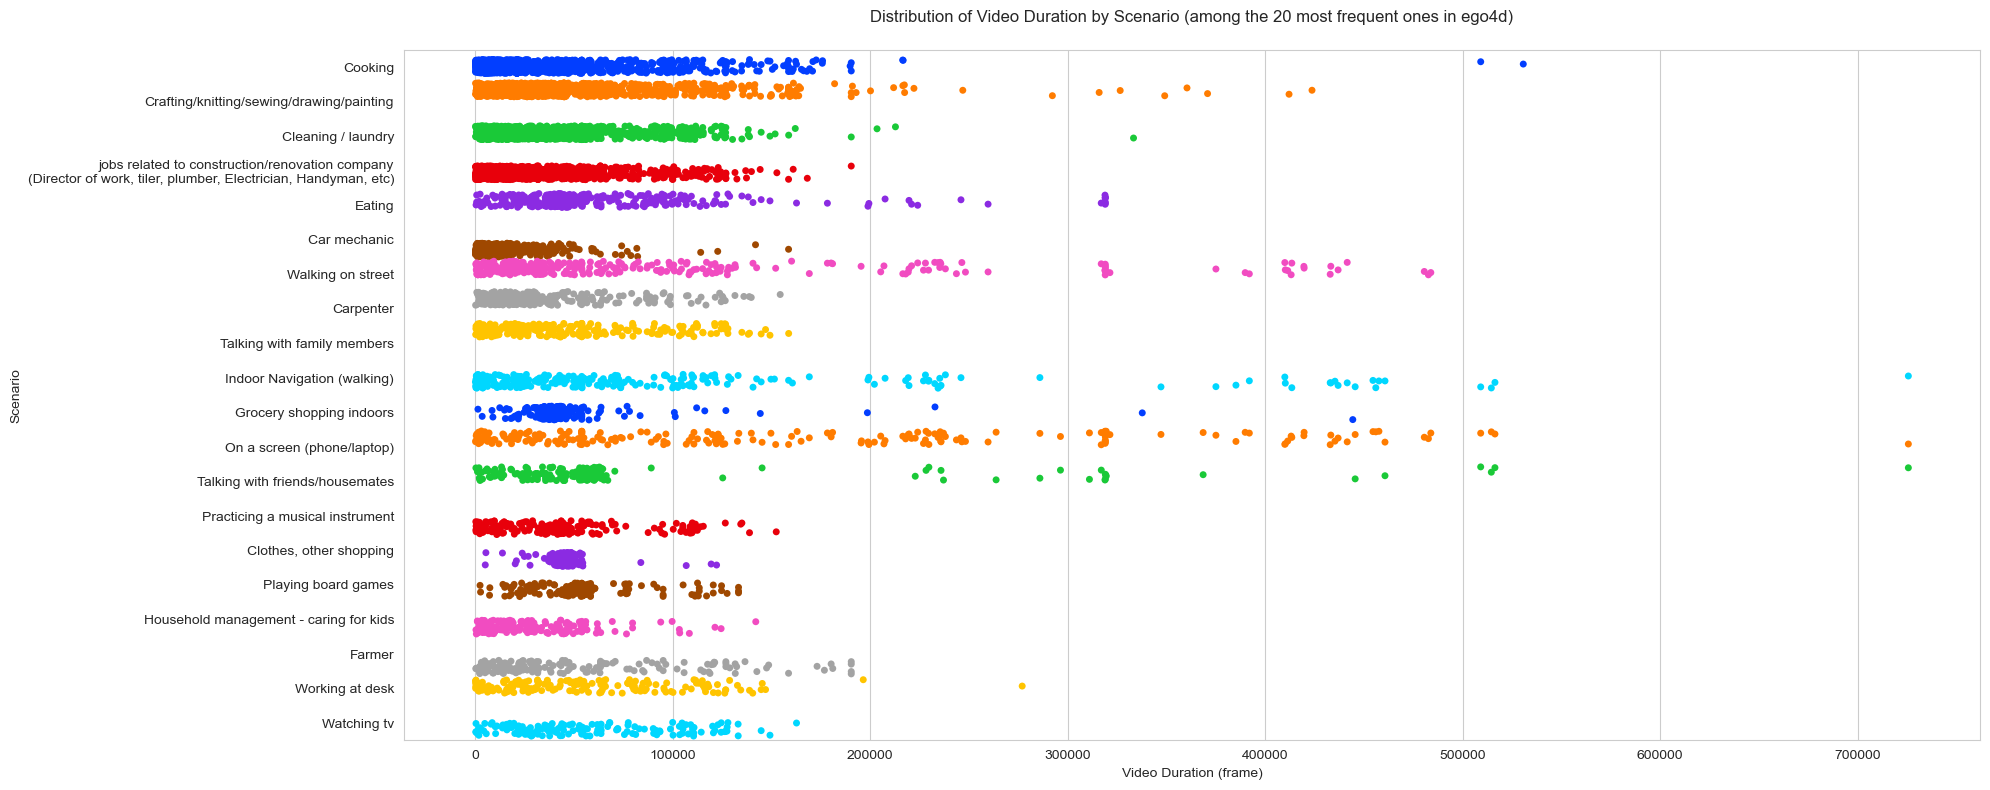

In [17]:
#Plot the distribution of video duration (in frame) for each one of the 20 most frequent scenarios.
df_top_20_scenarios = df_ego4d[df_ego4d['scenario'].isin(top_20_scenarios.index)]

plt.figure(figsize=(20, 8))
#better to use a scatter plot rather than boxplots, in order to represent a large amount of data
sns.stripplot(data=df_top_20_scenarios, y='scenario', x='duration_in_frame', order=top_20_scenarios.index, jitter=4, palette=scenario_colors, dodge=True, legend = False, hue = 'scenario')
plt.title('Distribution of Video Duration by Scenario (among the 20 most frequent ones in ego4d)', pad=20)
plt.ylabel('Scenario')
plt.xlabel('Video Duration (frame)')
plt.tight_layout()
#plt.savefig("DistributionVideoDurationByScenarioEgo4d.pdf")
plt.show()


Analysis of the Co-occurrence of Scenario pairs in Videos of the ego4d dataset (non-significant results)

In [18]:
#unintelligible 

#Unique videos_uids
unique_video_uids = df_ego4d['video_uid'].unique()

#Initialize a dictionary to store the co-occurrence counts
co_occurrence_counts = {}

#Iterate over "unique_video_uids" to count the co-occurrences
for video_uid in unique_video_uids:
    #Get all the scenarios present in the current video
    scenarios_present = df_ego4d[df_ego4d['video_uid'] == video_uid]['scenario'].unique()
    scenarios_present[scenarios_present==None]="None"
    #Count co-occurrences of scenario pairs (over the list of "scenarios_present")
    for i, scenario_i in enumerate(scenarios_present):
        for j, scenario_j in enumerate(scenarios_present):
            pair = (scenario_i, scenario_j)
            co_occurrence_counts[pair] = co_occurrence_counts.get(pair, 0) + 1

#Initialize the matrix used to store co-occurrence "probabilities"
unique_ego4d = df_ego4d['scenario'].unique()
unique_ego4d[unique_ego4d==None]="None"
num_scenarios = len(unique_ego4d)
co_occurrence_matrix = np.zeros((num_scenarios, num_scenarios))

#Populate the "co_occurrence_matrix"
for i, scenario_i in enumerate(unique_ego4d):
    for j, scenario_j in enumerate(unique_ego4d):
        pair = (scenario_i, scenario_j)
        pair_count = co_occurrence_counts.get(pair, 0) # 0 if the couple i,j is never present
        videos_with_scenario_i_count = co_occurrence_counts.get((scenario_i, scenario_i), 1) # 1 to avoid /0 division
        co_occurrence_matrix[i, j] = pair_count / videos_with_scenario_i_count

#Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(co_occurrence_matrix, cmap='viridis', xticklabels=unique_ego4d, yticklabels=unique_ego4d, alpha=0.9)
plt.title('Co-occurrence of Scenario Pairs in Videos of ego4d', pad=20)
plt.xlabel('Scenario j')
plt.ylabel('Scenario i')
plt.tight_layout()
#plt.show()
plt.close()

C:\Users\cucch\AppData\Local\Temp\ipykernel_15336\2784467959.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


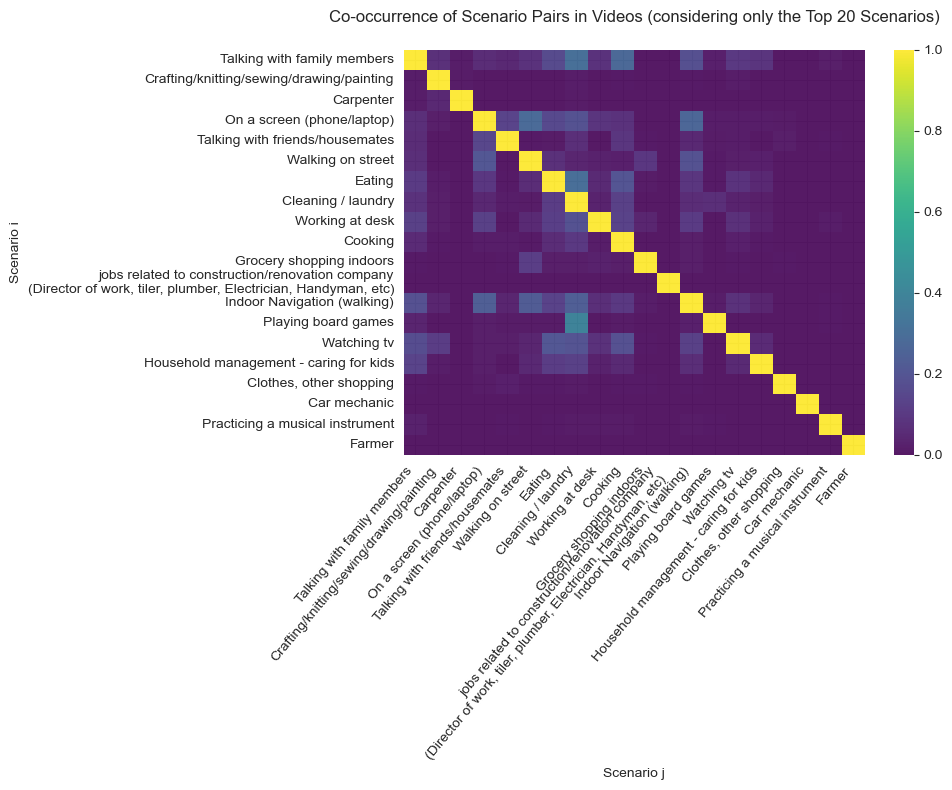

In [19]:
#Consider now only the top 20 scenarios: We do not detect particularly evident co-occurrence for any pair of scenarios.
unique_top_20_scenarios = df_top_20_scenarios['scenario'].unique()
co_occurrence_matrix_top_20 = np.zeros((20, 20))

for i, scenario_i in enumerate(unique_top_20_scenarios):
    for j, scenario_j in enumerate(unique_top_20_scenarios):
        pair_count = co_occurrence_counts.get((scenario_i, scenario_j), 0)
        videos_with_scenario_i_count = co_occurrence_counts.get((scenario_i, scenario_i), 1)
        co_occurrence_matrix_top_20[i, j] = pair_count / videos_with_scenario_i_count

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(co_occurrence_matrix_top_20, cmap='viridis', xticklabels=unique_top_20_scenarios, yticklabels=unique_top_20_scenarios, alpha=0.9)
plt.title('Co-occurrence of Scenario Pairs in Videos (considering only the Top 20 Scenarios)', pad=20)
plt.xlabel('Scenario j')
plt.ylabel('Scenario i')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

### Comparison between nlq_train.json and ego4d.json

Distribution of scenarios in nlq_train.json

In [20]:
#Merge the two dataframes "df_annotations" and "df_ego4d" on the field "video_uid"
merged_df = pd.merge(df_annotations, df_ego4d, on='video_uid')
#Scenarios' frequency in merged_df
scenario_counts = merged_df['scenario'].value_counts()
sorted_scenarios = merged_df['scenario'].value_counts().sort_values(ascending=False)
for scenario, frequency in sorted_scenarios.items():
    print(f"Scenario: {scenario}, Frequency: {frequency}")

Scenario: Cooking, Frequency: 3018
Scenario: Cleaning / laundry, Frequency: 2296
Scenario: Car mechanic, Frequency: 936
Scenario: Indoor Navigation (walking), Frequency: 917
Scenario: jobs related to construction/renovation company
(Director of work, tiler, plumber, Electrician, Handyman, etc), Frequency: 836
Scenario: Carpenter, Frequency: 822
Scenario: Talking with family members, Frequency: 596
Scenario: Walking on street, Frequency: 562
Scenario: Eating, Frequency: 492
Scenario: Playing with pets, Frequency: 381
Scenario: Grocery shopping indoors, Frequency: 332
Scenario: Scooter mechanic, Frequency: 305
Scenario: Clothes, other shopping, Frequency: 304
Scenario: Bike, Frequency: 268
Scenario: Baker, Frequency: 264
Scenario: Car - commuting, road trip, Frequency: 249
Scenario: Daily hygiene, Frequency: 235
Scenario: Playing board games, Frequency: 209
Scenario: Making coffee, Frequency: 203
Scenario: Walking the dog / pet, Frequency: 189
Scenario: Bike mechanic, Frequency: 178
Scen

There are 31 low-frequency scenarios (present less than 61 times):
scenario
Working in milktea shop                                                                                                                                                                61
Reading books                                                                                                                                                                          61
Cycling / jogging                                                                                                                                                                      60
Working out outside                                                                                                                                                                    59
Household management - caring for kids                                                                                                                                              

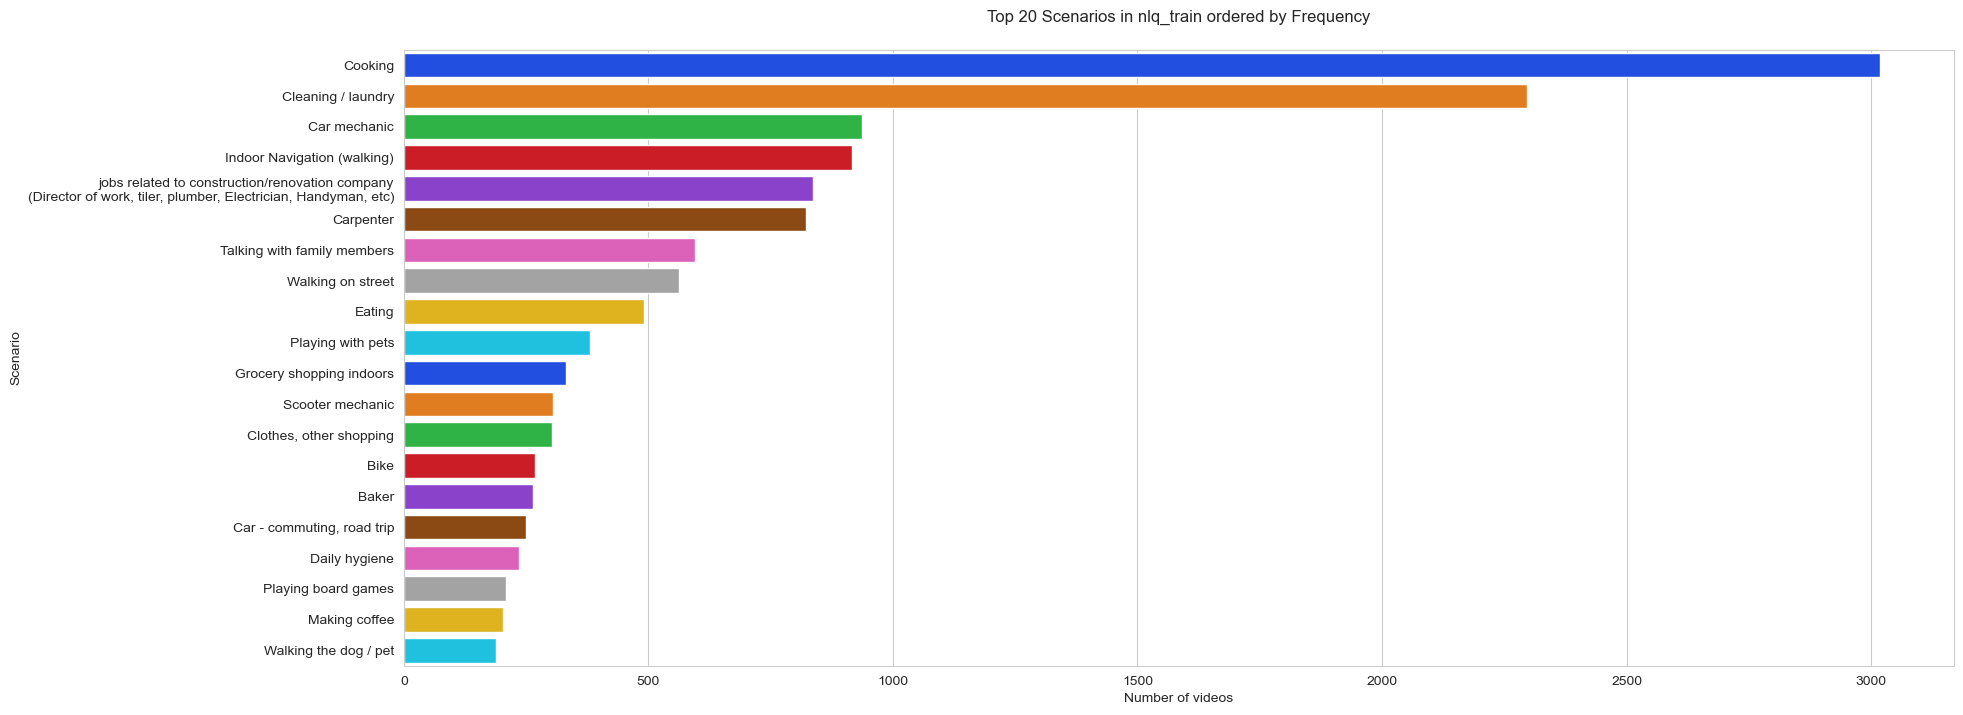

In [21]:
#print all the low-frequency scenarios
threshold_frequency = scenario_counts.quantile(0.4) 
low_frequency_scenarios = scenario_counts[scenario_counts <= threshold_frequency]
print(f"There are {len(low_frequency_scenarios)} low-frequency scenarios (present less than {int(threshold_frequency)} times):\n{low_frequency_scenarios}")
      
#Select the top 20 scenarios
top_20_scenarios = sorted_scenarios[0:20]

palette = sns.color_palette("bright", n_colors=len(top_20_scenarios))
scenario_colors = {scenario: palette[i] for i, scenario in enumerate(top_20_scenarios.index)}

#Plot the top 20 scenarios
plt.figure(figsize=(20, 8))
sns.barplot(x=top_20_scenarios.values, y=top_20_scenarios.index, palette=scenario_colors, dodge=False)
plt.title('Top 20 Scenarios in nlq_train ordered by Frequency', pad=20)
plt.xlabel('Number of videos')
plt.ylabel('Scenario')
plt.savefig("ScenariosFrequencyNlq_train.pdf")
plt.show()

Relation between scenario's type and videos' duration (limited to the 20 most frequent scenarios) in the nlq_train dataset

c:\Users\cucch\miniconda3\envs\MLDL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cucch\miniconda3\envs\MLDL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


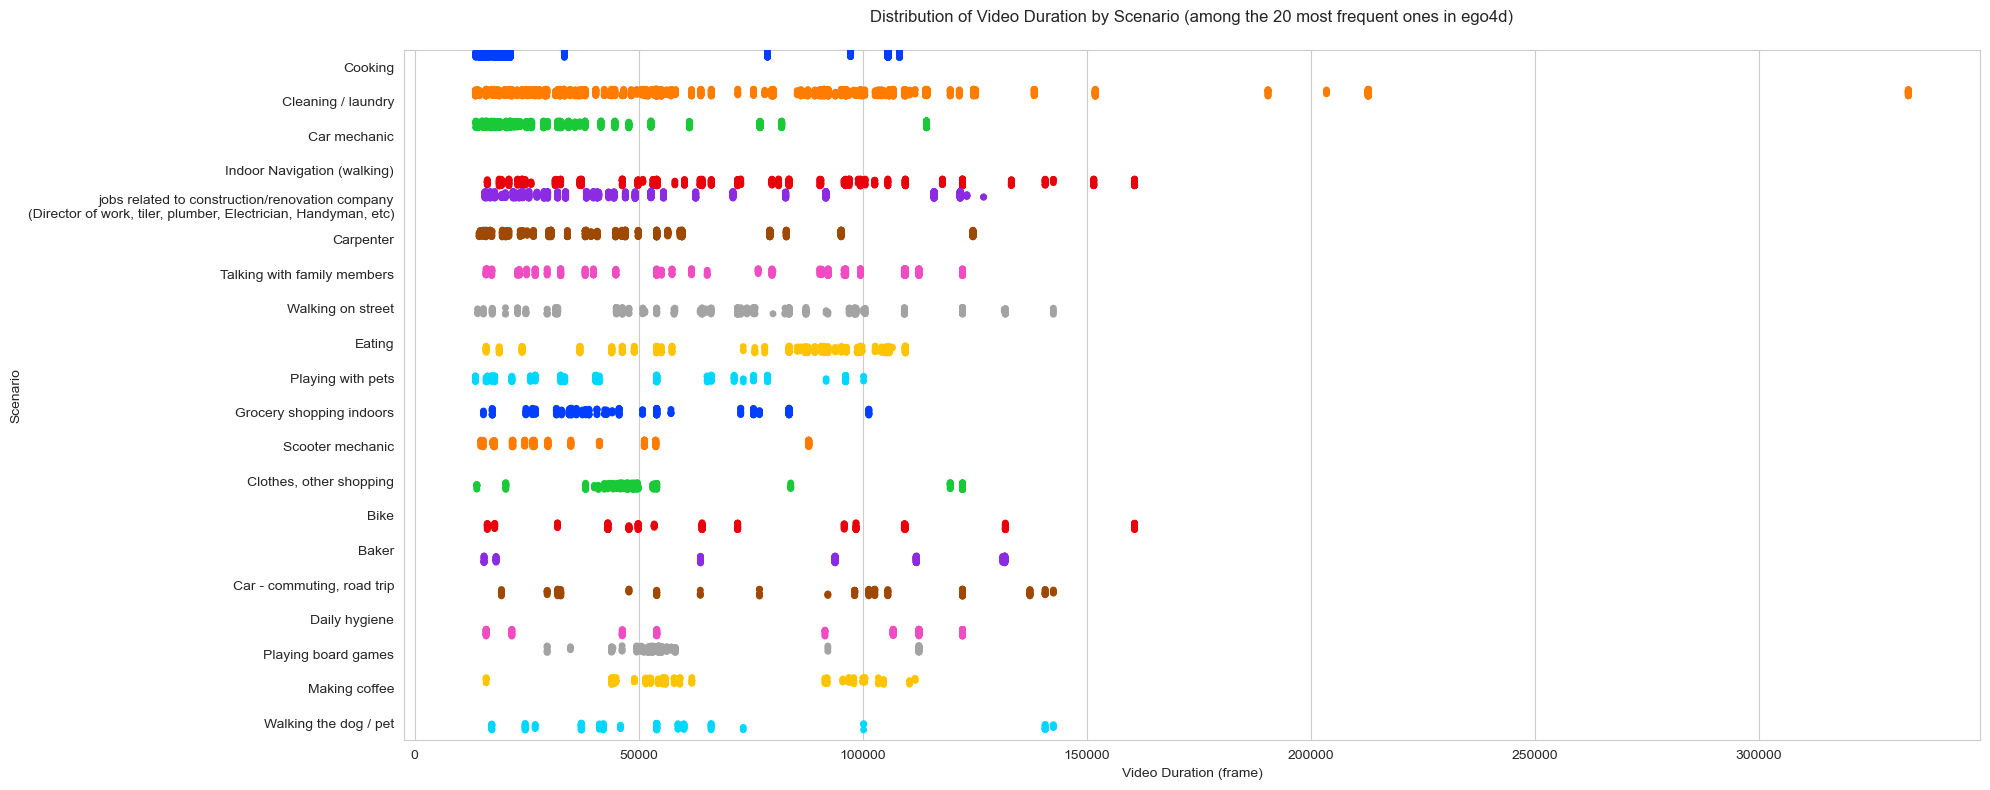

In [22]:
#Plot the distribution of video duration (in frame) for each one of the 20 most frequent scenarios.
df_top_20_scenarios = merged_df[merged_df['scenario'].isin(top_20_scenarios.index)]

plt.figure(figsize=(20, 8))
#better to use a scatter plot rather than boxplots, in order to represent a large amount of data
sns.stripplot(data=df_top_20_scenarios, y='scenario', x='duration_in_frame', order=top_20_scenarios.index, jitter=2, palette=scenario_colors, dodge=True, legend = False, hue = 'scenario')
plt.title('Distribution of Video Duration by Scenario (among the 20 most frequent ones in ego4d)', pad=20)
plt.ylabel('Scenario')
plt.xlabel('Video Duration (frame)')
plt.tight_layout()
plt.savefig("DistributionVideoDurationByScenarioNlqTrain.pdf")
plt.show()

Analysis of the relation between Scenarios and Templates found in nlq_train.json

In [23]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Group by ("scenario" & "template"), then count occurrences of each pair in the merged_df
template_counts = merged_df.groupby(['scenario', 'template']).size().reset_index(name='count')

#Find the most frequent template for each scenario
most_frequent_template_for_scen = template_counts.loc[template_counts.groupby('scenario')['count'].idxmax()]

print(most_frequent_template_for_scen)

                                              scenario  \
0                            Attending a lecture/class   
17   Attending sporting events - watching and parti...   
22                                     BBQ'ing/picnics   
35                                               Baker   
40                                            Baseball   
51                                          BasketBall   
62                                                Bike   
78                                       Bike mechanic   
91                                          Blacksmith   
100                                                Bus   
117                          Camp setup/pack-up/chores   
126                         Car - commuting, road trip   
138                                       Car mechanic   
151                                Car/scooter washing   
162                                          Carpenter   
180                                 Cleaning / laundry   
193           

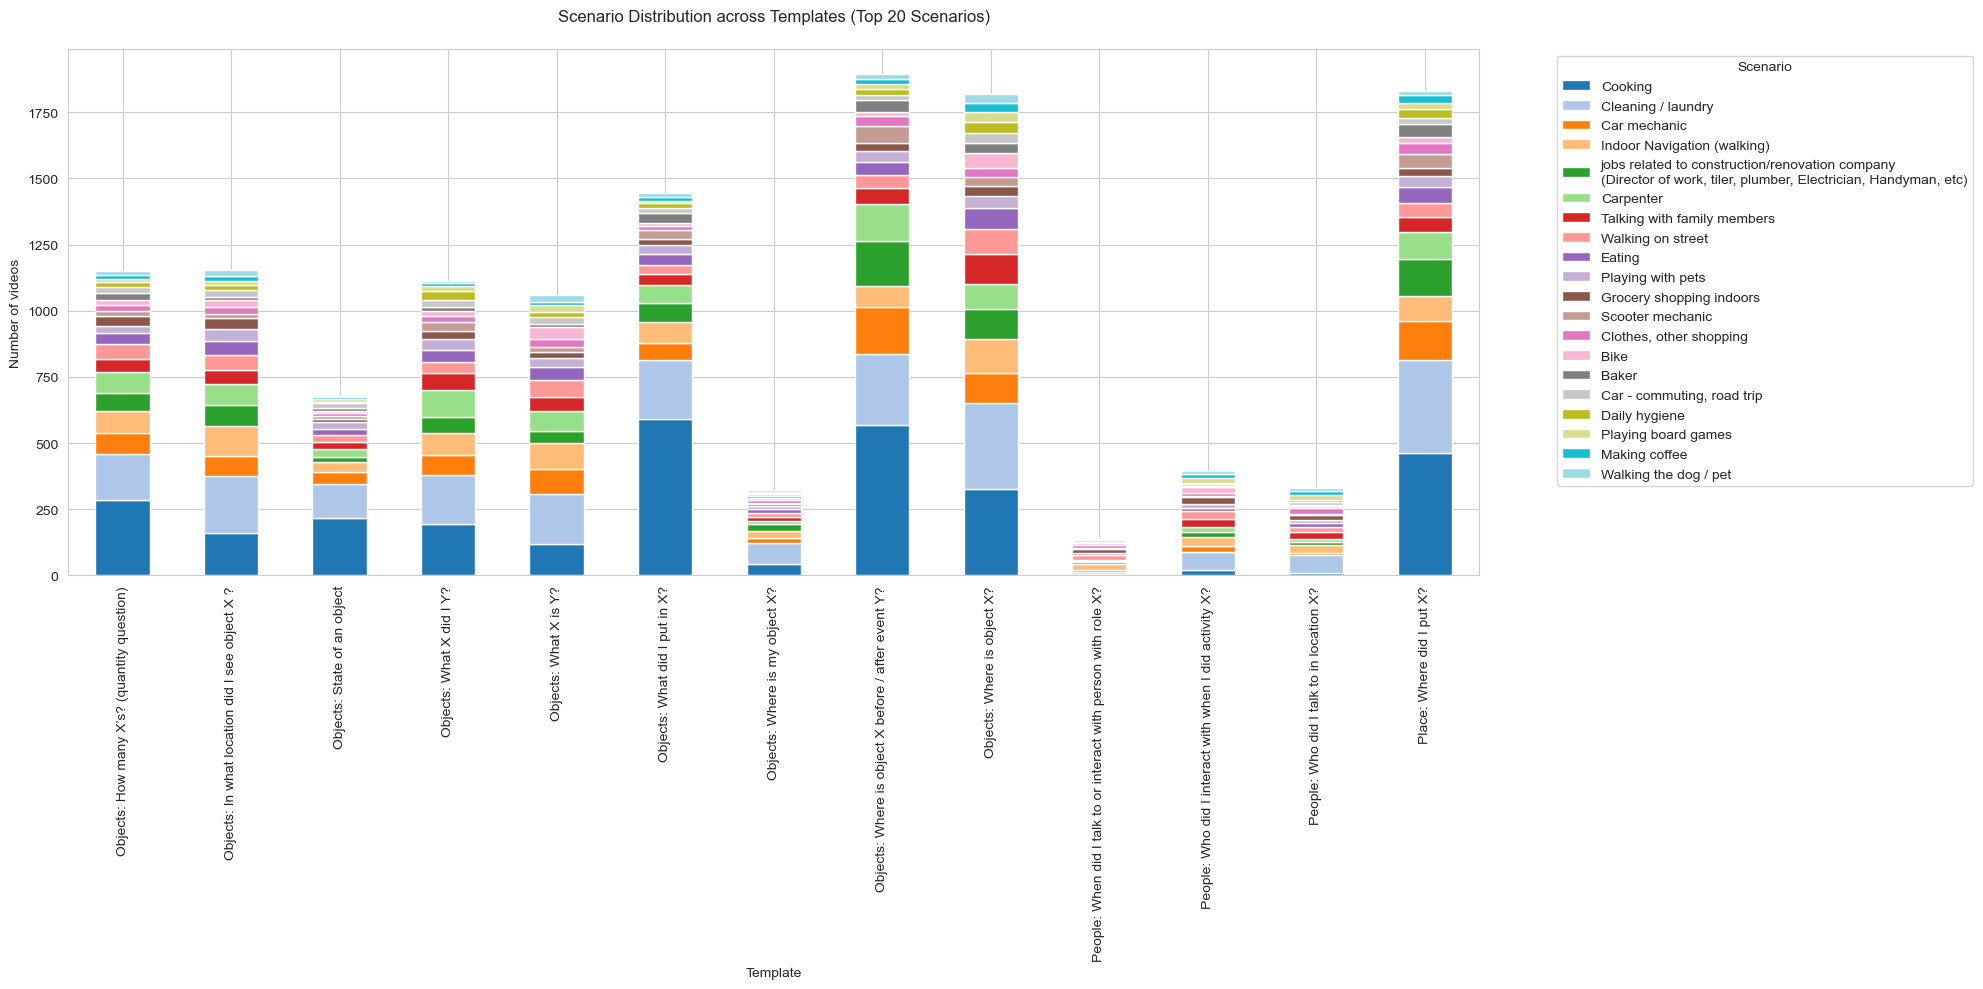

In [24]:
#Consider only top 20 scenarios by frequency
scenario_counts = merged_df['scenario'].value_counts()
top_20_scenarios = sorted_scenarios.index[:20]

filtered_df = merged_df[merged_df['scenario'].isin(top_20_scenarios)]

#Group by ("scenario" & "template"), and count the occurrences of each pair in merged_df_copy
template_counts = filtered_df.groupby(['scenario', 'template']).size().reset_index(name='count')

#Use pivot format to create a stacked bar graph easily
pivot_df = template_counts.pivot(index='template', columns='scenario', values='count').fillna(0)

#Colors
unique_colors = sns.color_palette("tab20", n_colors=len(top_20_scenarios))
#Map scenario to color
scenario_colors = {scenario: unique_colors[i] for i, scenario in enumerate(top_20_scenarios)}

#Order pivot_df_percent to mantain order of the colors
pivot_df = pivot_df[top_20_scenarios]

pivot_df.plot(kind='bar', stacked=True, figsize=(20, 10), color=[scenario_colors[scenario] for scenario in top_20_scenarios])

plt.title('Scenario Distribution across Templates (Top 20 Scenarios)', pad=20)
plt.xlabel('Template')
plt.ylabel('Number of videos')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.savefig("StackedBar_ScenarioDistribution_Top20.pdf")
plt.show()

C:\Users\cucch\AppData\Local\Temp\ipykernel_15336\4167763225.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_scenarios = df.groupby('template').apply(lambda x: x.nlargest(top_n, 'count')).reset_index(drop=True)


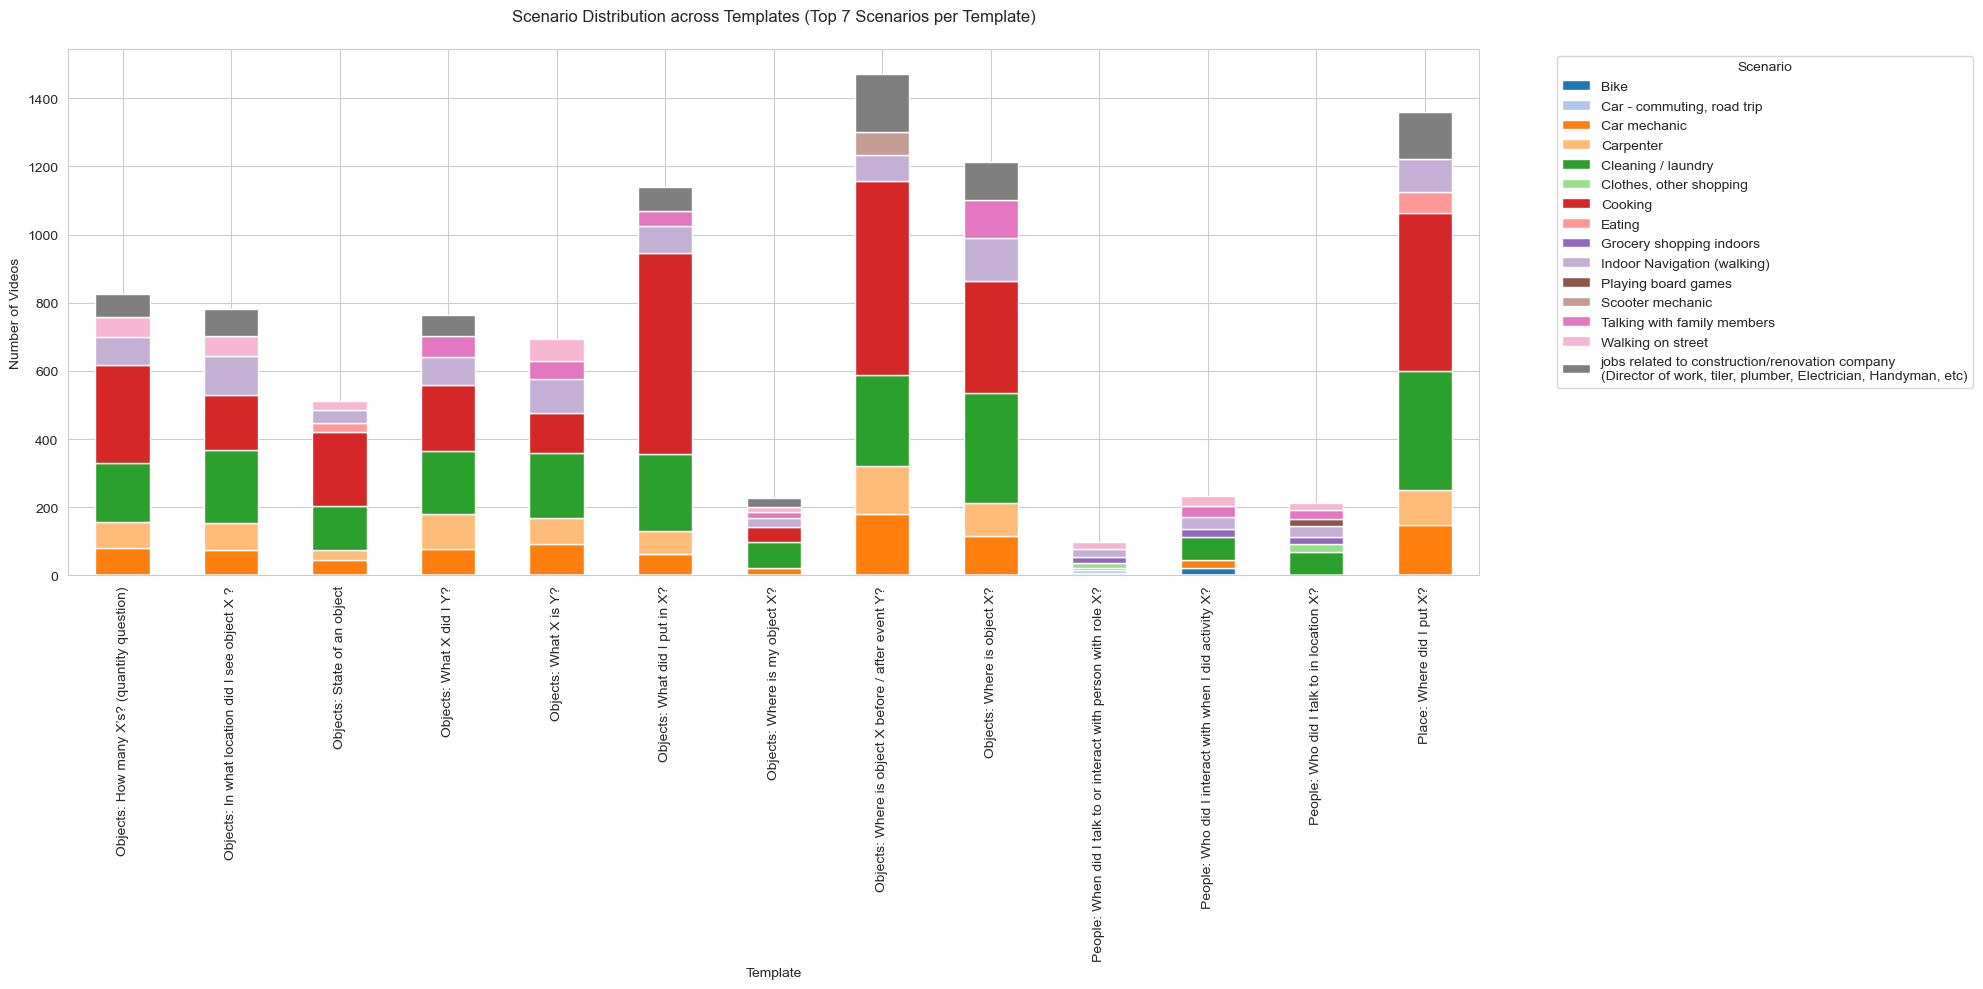

In [25]:
#Let's consider, for each template, its 7 most frequent scenarios.
template_scenario_counts = merged_df.groupby(['template', 'scenario']).size().reset_index(name='count')

def get_top_scenarios_per_template(df, top_n=7):
    top_scenarios = df.groupby('template').apply(lambda x: x.nlargest(top_n, 'count')).reset_index(drop=True)
    return top_scenarios

top_scenarios_per_template = get_top_scenarios_per_template(template_scenario_counts)

#Use pivot format to create a stacked bar graph easily
pivot_df = top_scenarios_per_template.pivot(index='template', columns='scenario', values='count').fillna(0)

#Colors
unique_colors = sns.color_palette("tab20", n_colors=len(pivot_df.columns))
#Map scenario to color
scenario_colors = {scenario: unique_colors[i] for i, scenario in enumerate(pivot_df.columns)}

pivot_df.plot(kind='bar', stacked=True, figsize=(20, 10), color=[scenario_colors[scenario] for scenario in pivot_df.columns])

plt.title('Scenario Distribution across Templates (Top 7 Scenarios per Template)', pad=20)
plt.xlabel('Template')
plt.ylabel('Number of Videos')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.savefig("StackedBar_ScenarioDistribution_Top7PerTemplate.pdf")
plt.show()

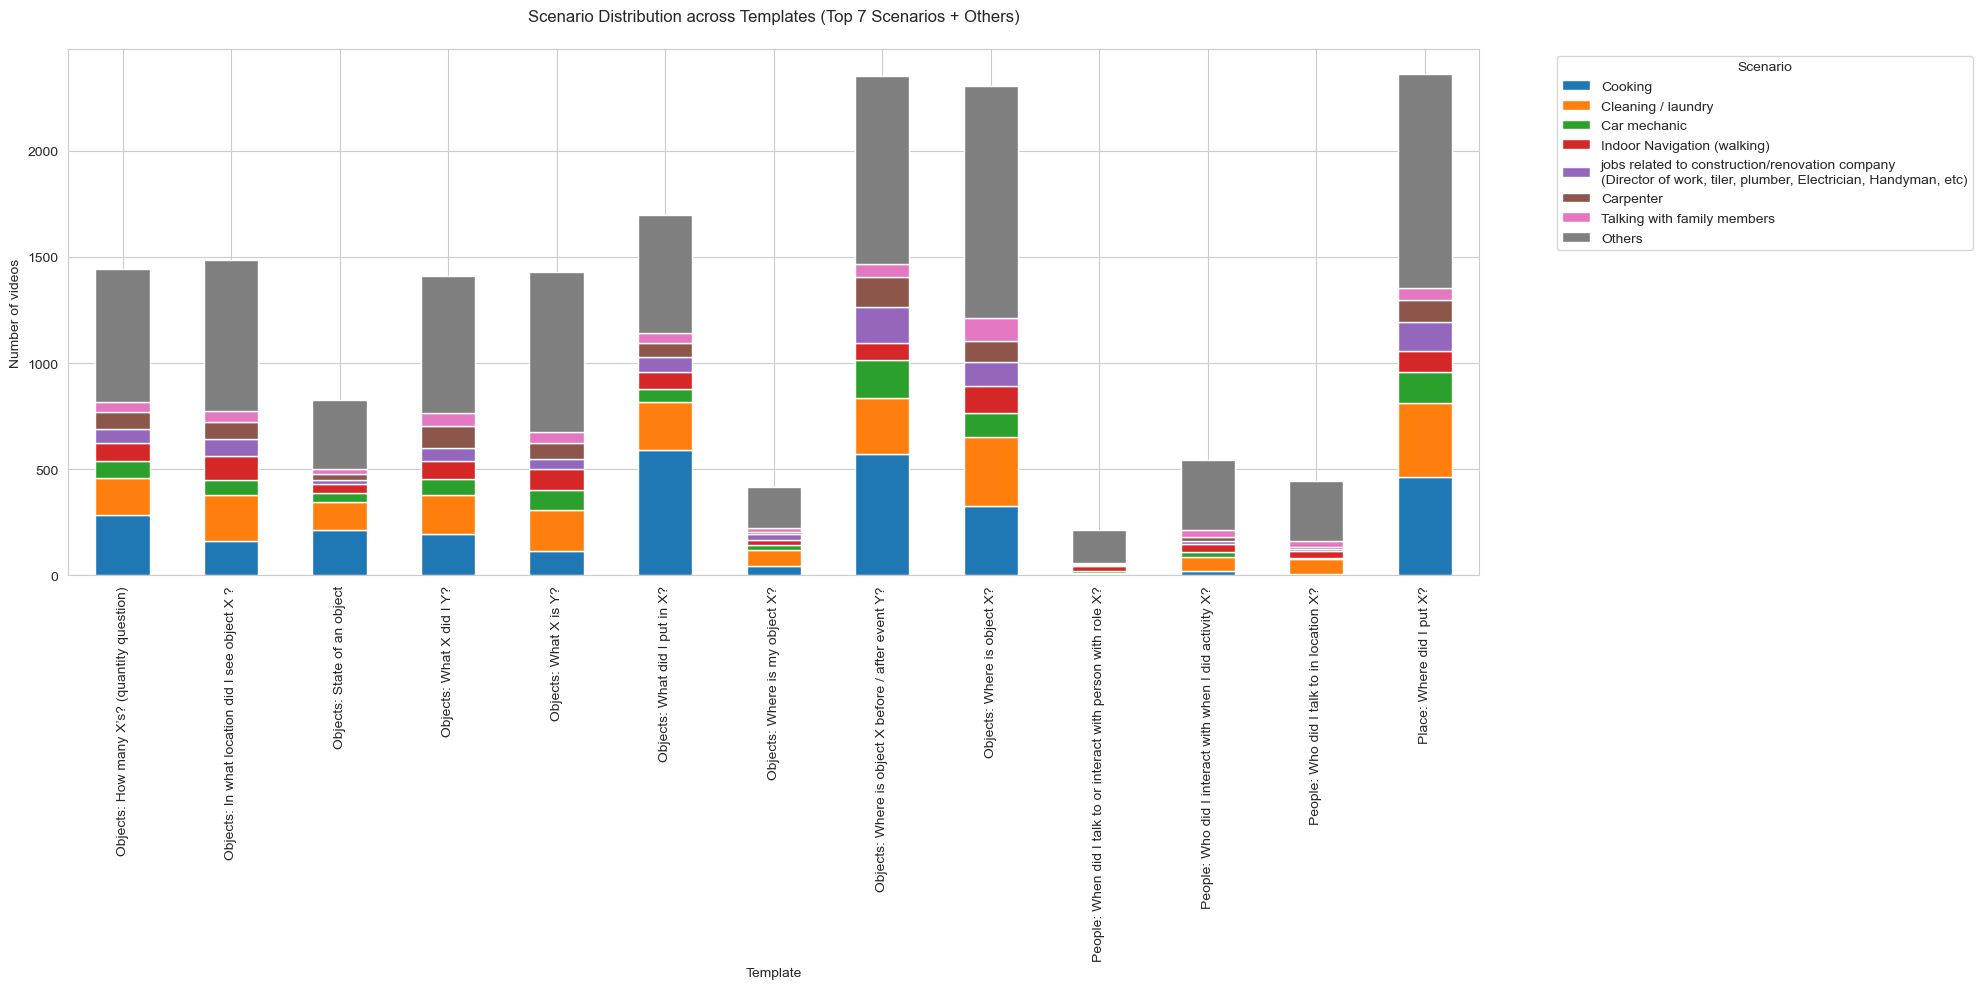

In [26]:
#Assign the label "Others" to low-frequency scenarios

top_scenarios = sorted_scenarios.index[:7]
merged_df['scenario_category'] = merged_df['scenario'].apply(lambda x: x if x in top_scenarios else 'Others')

#Group by ("scenario" & "template"), and count the occurrences of each pair in merged_df_copy
template_counts = merged_df.groupby(['scenario_category', 'template']).size().reset_index(name='count')

pivot_df = template_counts.pivot(index='template', columns='scenario_category', values='count').fillna(0)

#Colors
unique_colors = sns.color_palette("tab10", n_colors=len(top_scenarios) + 1)
#Map scenario to color
scenario_colors = {scenario: unique_colors[i] for i, scenario in enumerate(list(top_scenarios) + ['Others'])}

#Order pivot_df_percent to mantain order of the colors
pivot_df = pivot_df[list(top_scenarios) + ['Others']]

pivot_df.plot(kind='bar', stacked=True, figsize=(20, 10), color=[scenario_colors[scenario] for scenario in list(top_scenarios) + ['Others']])

plt.title('Scenario Distribution across Templates (Top 7 Scenarios + Others)', pad=20)
plt.xlabel('Template')
plt.ylabel('Number of videos')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.savefig("StackedBar_ScenarioDistribution_Top7_Others.pdf")
plt.show()

836


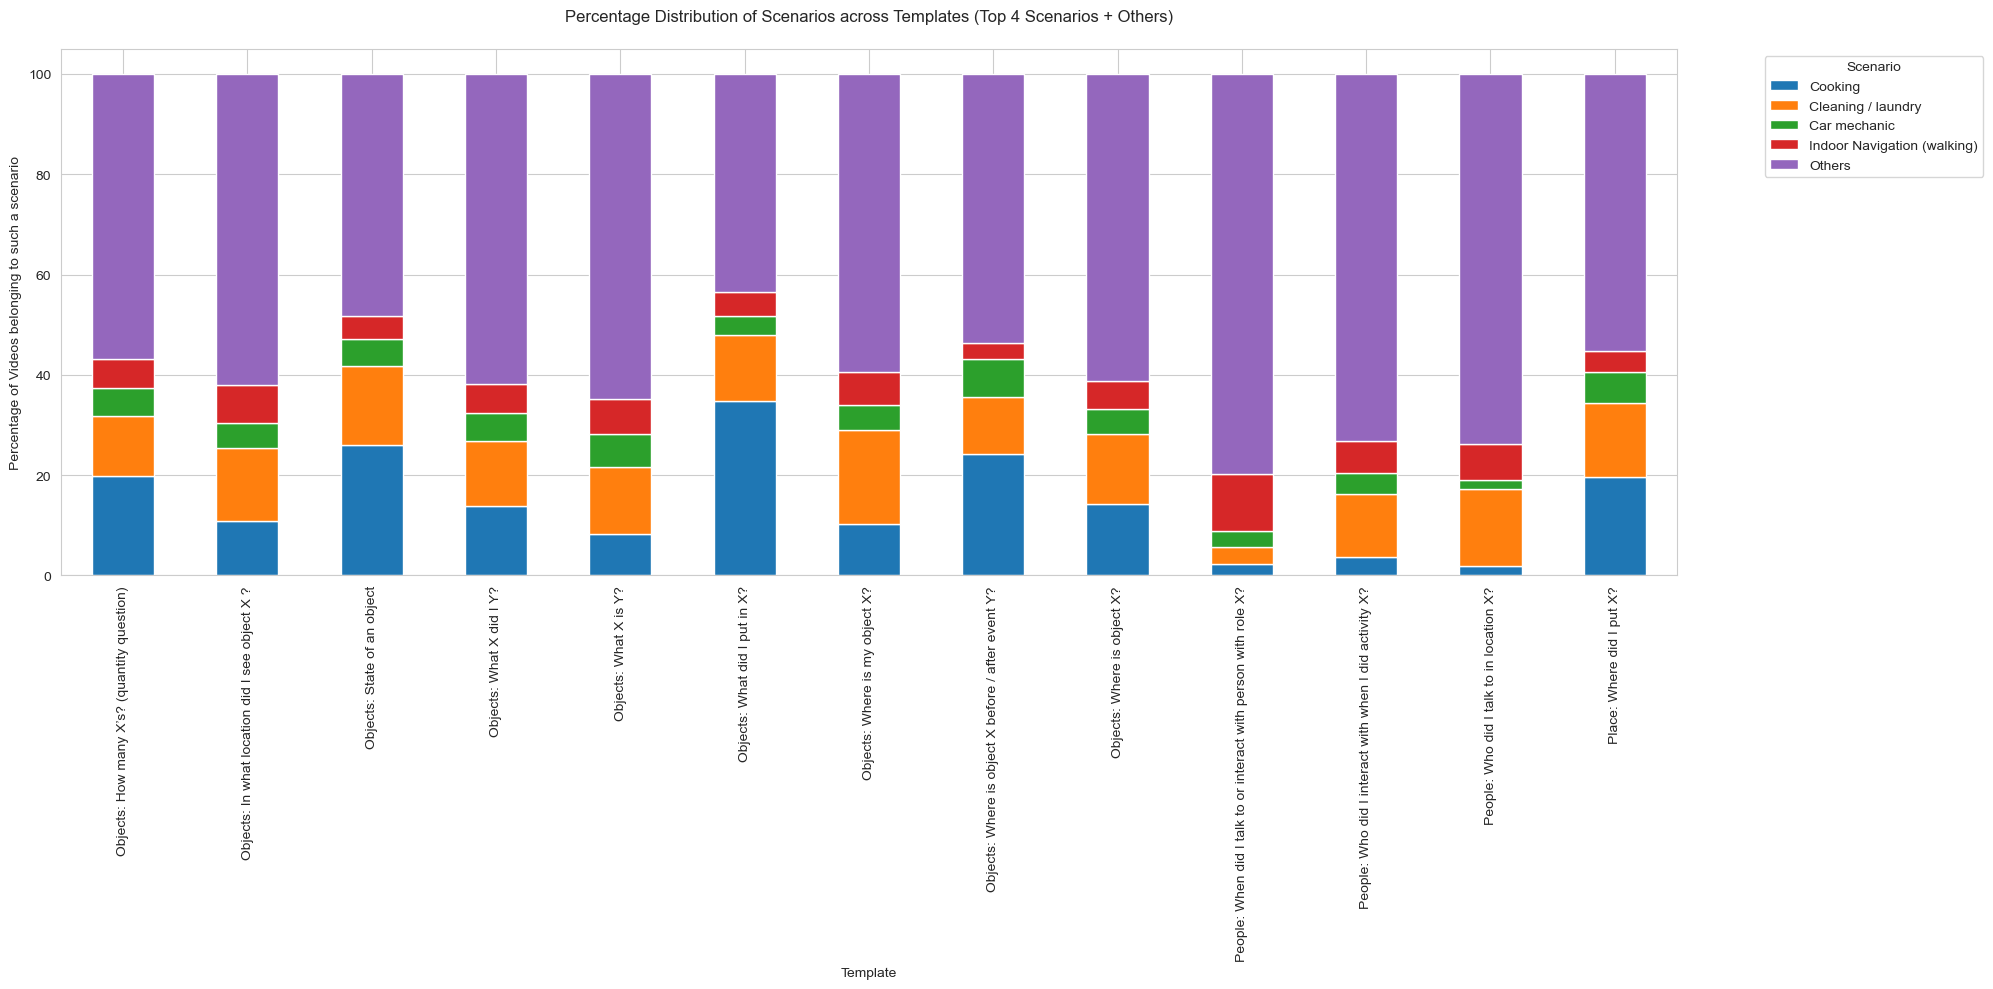

In [27]:
#Percentage distribution

top_scenarios = sorted_scenarios.index[:4]
eighth_scenario_count = sorted_scenarios.iloc[4]
print(eighth_scenario_count) #= 562
#assign the label "Others" to low-frequency scenarios
merged_df['scenario_category'] = merged_df['scenario'].apply(lambda x: x if x in top_scenarios else 'Others')

#Group by ("scenario" & "template"), and count the occurrences of each pair in merged_df_copy
template_counts = merged_df.groupby(['scenario_category', 'template']).size().reset_index(name='count')

pivot_df = template_counts.pivot(index='template', columns='scenario_category', values='count').fillna(0)

#Compute the percetage for each template
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100 

#Colors
unique_colors = sns.color_palette("tab10", n_colors=len(top_scenarios) + 1)
#Map scenario to color
scenario_colors = {scenario: unique_colors[i] for i, scenario in enumerate(list(top_scenarios) + ['Others'])}

#Order pivot_df_percent to mantain order of the colors
pivot_df_percent = pivot_df_percent[list(top_scenarios) + ['Others']]

pivot_df_percent.plot(kind='bar', stacked=True, figsize=(20, 10), color=[scenario_colors[scenario] for scenario in list(top_scenarios) + ['Others']])

plt.title('Percentage Distribution of Scenarios across Templates (Top 4 Scenarios + Others)', pad=20)
plt.xlabel('Template')
plt.ylabel('Percentage of Videos belonging to such a scenario')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("StackedBar_PercentageDistribution_Top4_Others.pdf")
plt.show()